In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("./dataset.csv")
df.head()

,location,district,rooms,size,level,max_levels,price
0,"город Ташкент, Юнусабадский район, Юнусабад 8-...",Юнусабадский,3,57,4,4,52000
1,"город Ташкент, Яккасарайский район, 1-й тупик ...",Яккасарайский,2,52,4,5,56000
2,"город Ташкент, Чиланзарский район, Чиланзар 2-...",Чиланзарский,2,42,4,4,37000
3,"город Ташкент, Чиланзарский район, Чиланзар 9-...",Чиланзарский,3,65,1,4,49500
4,"город Ташкент, Чиланзарский район, площадь Актепа",Чиланзарский,3,70,3,5,55000


Data Frame ni o'lchami

In [3]:
df.shape

(7565, 7)

In [4]:
df.to_csv("dataset.csv",index=False)

In [5]:
df.isnull().sum()/len(df)

location      0.0
district      0.0
rooms         0.0
size          0.0
level         0.0
max_levels    0.0
price         0.0
dtype: float64

# Ustunlar ta'rifi
- `location` - sotilayotgan uy manzili
- `district` - uy joylashgan tuman
- `rooms` - xonalar soni
- `size` - uy maydoni (kv.m)
- `level` - uy joylashgan qavat
- `max_levels` - ja'mi qavatlar soni
- `price` - uy narxi

In [6]:
df.head(10)

,location,district,rooms,size,level,max_levels,price
0,"город Ташкент, Юнусабадский район, Юнусабад 8-...",Юнусабадский,3,57,4,4,52000
1,"город Ташкент, Яккасарайский район, 1-й тупик ...",Яккасарайский,2,52,4,5,56000
2,"город Ташкент, Чиланзарский район, Чиланзар 2-...",Чиланзарский,2,42,4,4,37000
3,"город Ташкент, Чиланзарский район, Чиланзар 9-...",Чиланзарский,3,65,1,4,49500
4,"город Ташкент, Чиланзарский район, площадь Актепа",Чиланзарский,3,70,3,5,55000
5,"город Ташкент, Чиланзарский район, Чиланзар 6-...",Чиланзарский,1,28,1,4,25500
6,"город Ташкент, Чиланзарский район, Чиланзар-16",Чиланзарский,1,30,2,4,21200
7,"город Ташкент, Яккасарайский район, Саламатина",Яккасарайский,2,32,5,5,20000
8,"город Ташкент, Учтепинский район, Чиланзар-21",Учтепинский,2,51,3,4,26200
9,"город Ташкент, Чиланзарский район, Чиланзар-8",Чиланзарский,1,30,1,4,22200


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7565 entries, 0 to 7564
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   location    7565 non-null   object
 1   district    7565 non-null   object
 2   rooms       7565 non-null   int64 
 3   size        7565 non-null   object
 4   level       7565 non-null   int64 
 5   max_levels  7565 non-null   int64 
 6   price       7565 non-null   object
dtypes: int64(3), object(4)
memory usage: 413.8+ KB


<h4>Ma'lumotlar</h4>
<p>Bu yerda ko'rishimiz mumkin. Xonalarimiz size va price object type da ekan biz bularni int type ga o'zgartirib olishimz kerak.</p>

In [8]:
index = df[df['price']=='Договорная'].index
index

Index([ 202,  411,  439,  460,  507,  521,  522,  523,  584,  800,  873,  880,
        882,  883,  886,  892,  988, 1027, 1318, 1541, 1601, 1804, 1805, 2004,
       2006, 2580, 2625, 2673, 2705, 2797, 2894, 2942, 3431, 3436, 3454, 3455,
       3456, 3470, 3495, 3510, 3528, 3535, 3536, 3572, 3574, 3589, 3605, 3637,
       3677, 3711, 3712, 3713, 3714, 4061, 4158, 4188, 4278, 4298, 4328, 4361,
       4420, 4425, 4453, 4659, 4746, 4747, 4879, 5002, 5003, 5004, 5105, 5637,
       5801, 5838, 5848, 5887, 5920, 6099, 6542, 6602, 6603, 6604, 6605, 6606,
       6607, 6608, 6639, 6662, 6738, 6819, 6836, 6843, 6859, 6954, 7039, 7196,
       7323, 7403, 7404],
      dtype='int64')

In [9]:
len(index)

99

In [10]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
7560    False
7561    False
7562    False
7563    False
7564    False
Length: 7565, dtype: bool

#### Kelishiladi degan qiymatlarmiz jami narxlarni 1.3 % ni tashkil etar ekan.

In [14]:
len(index)/df.shape[0] * 100

1.3086582947785856

In [15]:
df.drop(np.array(index),inplace=True) # tashlab yuborish va df ga saqlash

In [16]:
len(df['price']) # jami qatorlar soni

7466

In [17]:
df['price'] = df['price'].astype(np.int64) # price ustunini int64 type ga o'tkazib olish

In [18]:
index_size = df[df['size']=='Площадьземли:1сот'].index # size ustunida ham string qiymat aniqlandi ularni indexlarni aniqlan olish

In [19]:
len(index_size) # ularning soni 1 ta

1

In [20]:
df.drop(index_size,inplace=True) # shu qiymatni tashlab yuborish

In [21]:
df['size'] = df['size'].astype(np.float64) # size ustunini float64 type ga o'tkazib olish

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7465 entries, 0 to 7564
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    7465 non-null   object 
 1   district    7465 non-null   object 
 2   rooms       7465 non-null   int64  
 3   size        7465 non-null   float64
 4   level       7465 non-null   int64  
 5   max_levels  7465 non-null   int64  
 6   price       7465 non-null   int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 466.6+ KB


In [23]:
df.describe()

,rooms,size,level,max_levels,price
count,7465.000000,7465.000000,7465.000000,7465.000000,7.465000e+03
mean,2.622103,113.537018,3.693771,6.023979,7.132367e+04
std,1.083155,1501.157996,2.236905,2.607103,6.405659e+05
min,1.000000,1.000000,1.000000,1.000000,2.000000e+00
25%,2.000000,50.000000,2.000000,4.000000,3.500000e+04
50%,3.000000,65.000000,3.000000,5.000000,4.650000e+04
75%,3.000000,85.000000,5.000000,9.000000,6.700000e+04
max,10.000000,70000.000000,19.000000,25.000000,5.200000e+07


<p>Bu yerda ko'rishimiz mumkin, uylarni max xonalar soni 10 ta ekan, min 1 ta xonali ekan.</p>
<p>Eng katta uy maydoni 70000 ekan va 75% uylarning maydoni 85 ga teng ekan, hamda min maydoni 1 ga teng ekan.</p>
<p>Shuningdek, biz ko'rishim mumkin, uylarning min 2 ga va max narxni 52 mln ga teng ekan.</p>

In [24]:
df.isnull().sum()/len(df)

location      0.0
district      0.0
rooms         0.0
size          0.0
level         0.0
max_levels    0.0
price         0.0
dtype: float64

In [25]:
df.drop(columns=['location'],inplace=True)

In [26]:
df.head()

,district,rooms,size,level,max_levels,price
0,Юнусабадский,3,57.0,4,4,52000
1,Яккасарайский,2,52.0,4,5,56000
2,Чиланзарский,2,42.0,4,4,37000
3,Чиланзарский,3,65.0,1,4,49500
4,Чиланзарский,3,70.0,3,5,55000


### Vizualizatsiya

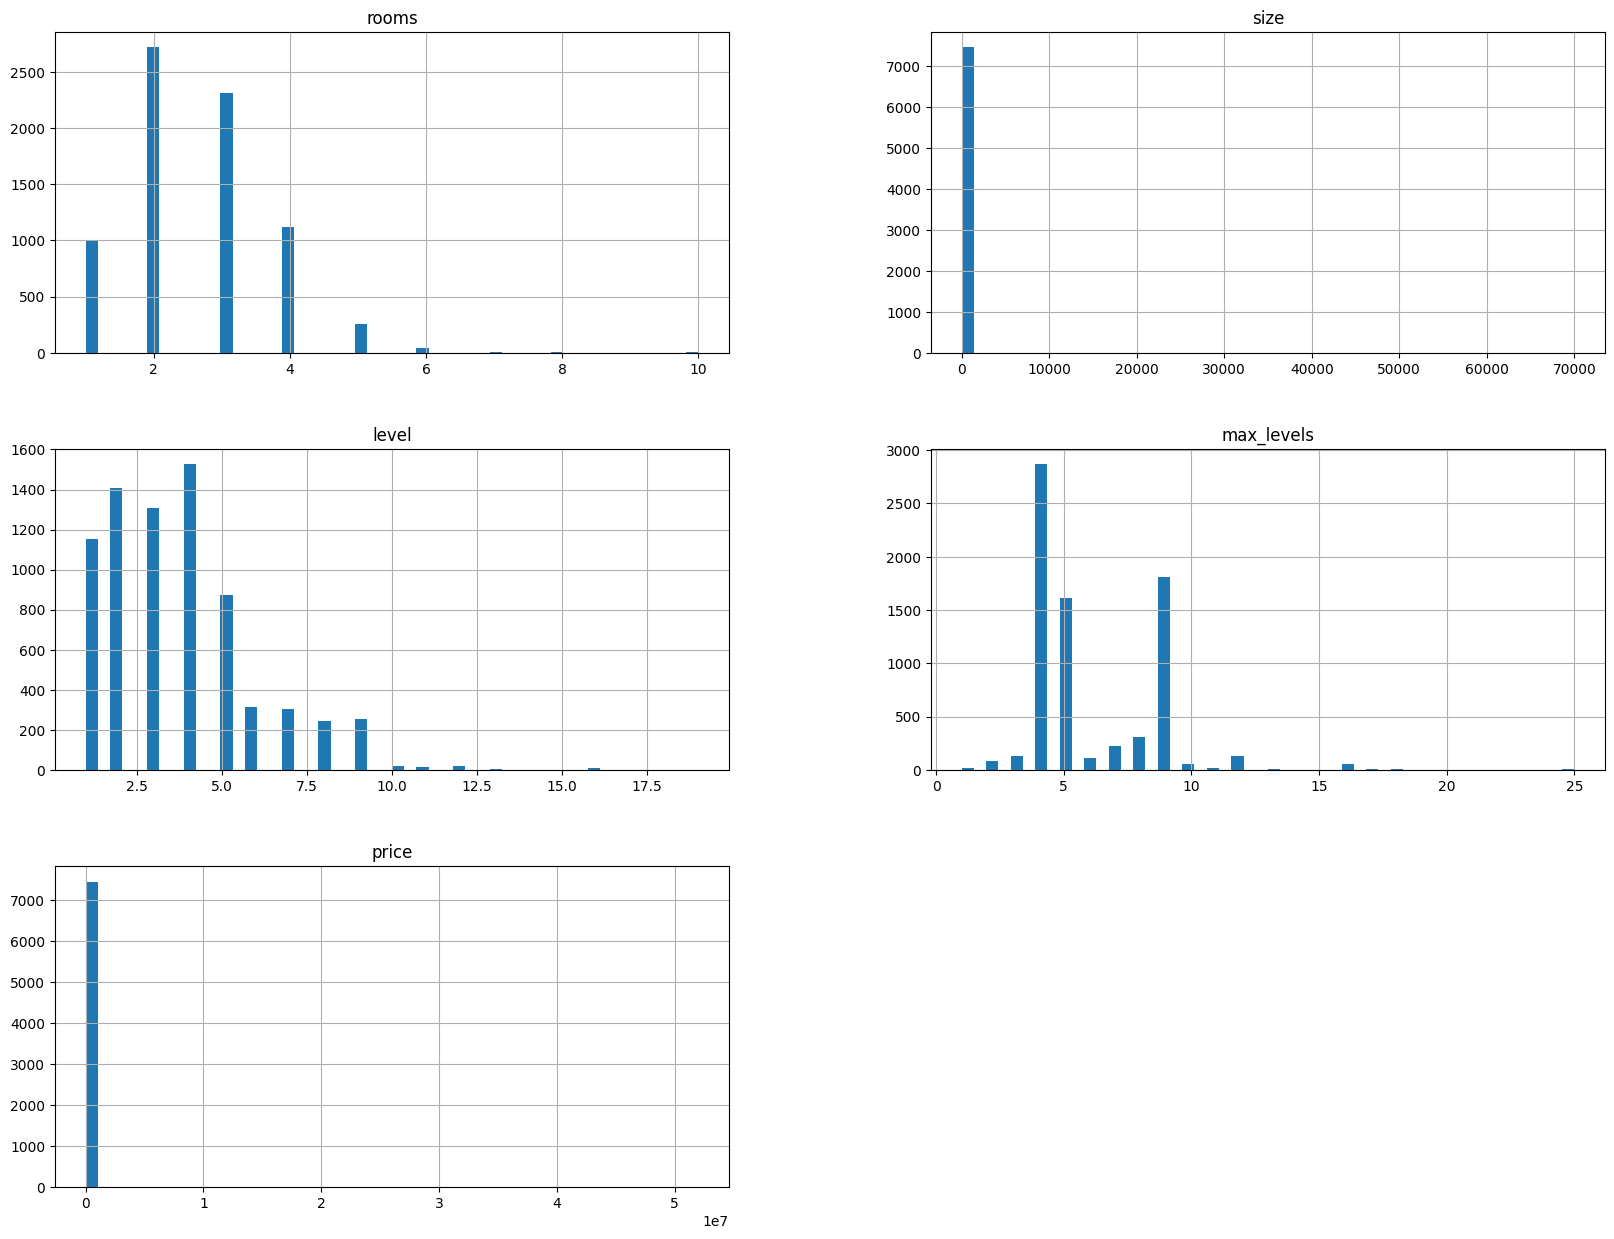

In [27]:
df.hist(bins=50,figsize=(20,15))
plt.show()

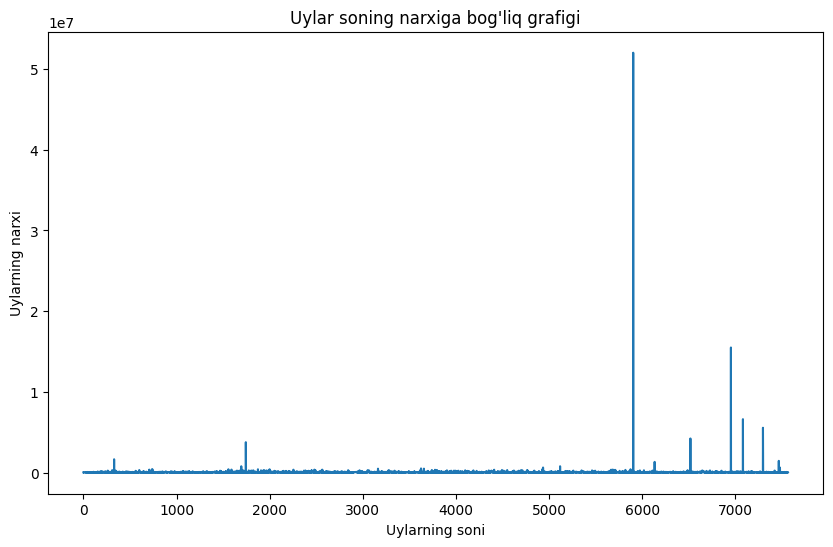

In [28]:
plt.figure(figsize=(10,6))
sns.lineplot(data=df['price'])
plt.xlabel("Uylarning soni")
plt.ylabel("Uylarning narxi")
plt.title("Uylar soning narxiga bog'liq grafigi")
plt.show()

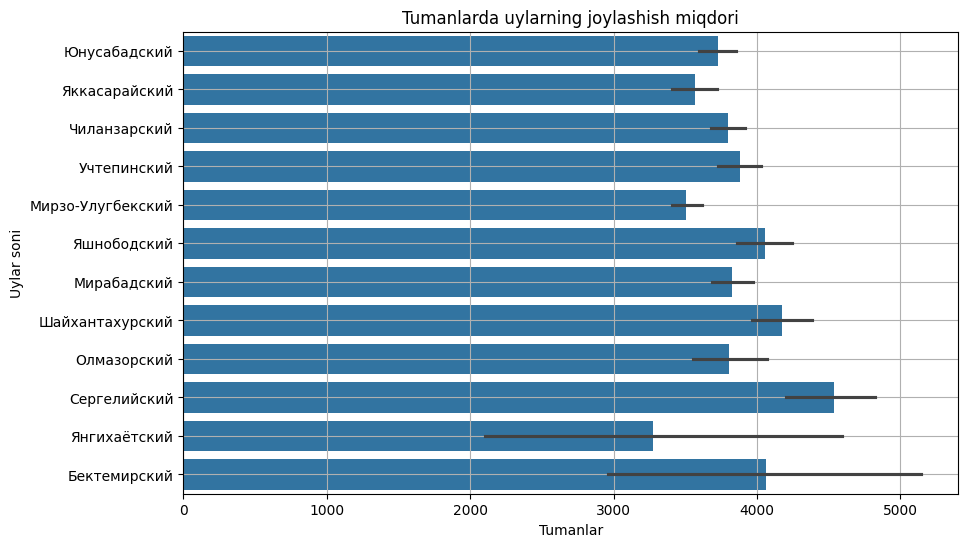

In [29]:
plt.figure(figsize=(10,6))
sns.barplot(x=df.index,y=df['district'])
plt.title("Tumanlarda uylarning joylashish miqdori")
plt.xlabel("Tumanlar")
plt.ylabel("Uylar soni")
plt.grid()
plt.show()

<p>Bu yerdan xulosa qilishimiz mumkin, eng ko'p uylar Sergeli tumanida ekan.</p>

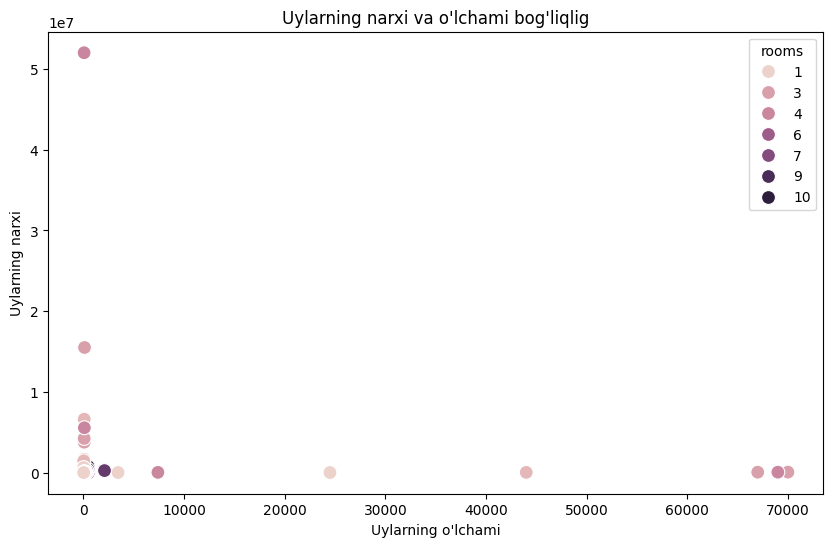

In [30]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df,x=df['size'],y=df['price'],hue=df['rooms'],s=100)
plt.title("Uylarning narxi va o'lchami bog'liqlig")
plt.xlabel("Uylarning o'lchami")
plt.ylabel("Uylarning narxi")
plt.show()

In [31]:
df.head()

,district,rooms,size,level,max_levels,price
0,Юнусабадский,3,57.0,4,4,52000
1,Яккасарайский,2,52.0,4,5,56000
2,Чиланзарский,2,42.0,4,4,37000
3,Чиланзарский,3,65.0,1,4,49500
4,Чиланзарский,3,70.0,3,5,55000


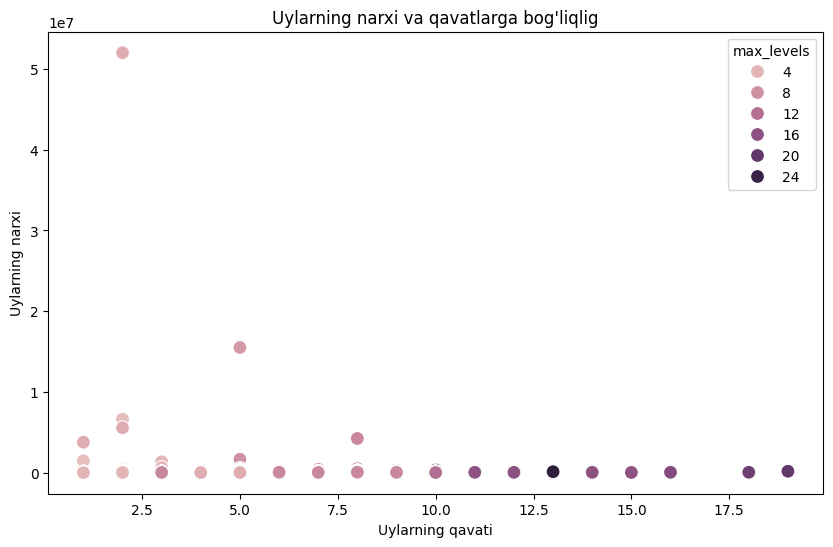

In [32]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df,x=df['level'],y=df['price'],hue=df['max_levels'],s=100)
plt.title("Uylarning narxi va qavatlarga bog'liqlig")
plt.xlabel("Uylarning qavati")
plt.ylabel("Uylarning narxi")
plt.show()

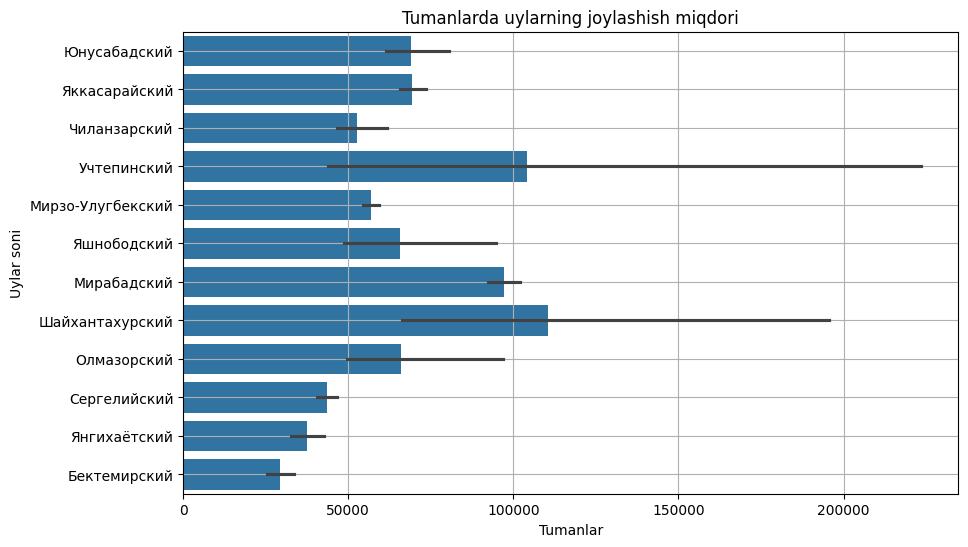

In [33]:
plt.figure(figsize=(10,6))
sns.barplot(x=df['price'],y=df['district'])
plt.title("Tumanlarda uylarning joylashish miqdori")
plt.xlabel("Tumanlar")
plt.ylabel("Uylar soni")
plt.grid()
plt.show()

<p>Bu grafikdan shunday xulosaga kelishimiz mumkin. Eng qimmat uylar Shoyxontahur tumanida ekan.</p>

In [34]:
df.head()

,district,rooms,size,level,max_levels,price
0,Юнусабадский,3,57.0,4,4,52000
1,Яккасарайский,2,52.0,4,5,56000
2,Чиланзарский,2,42.0,4,4,37000
3,Чиланзарский,3,65.0,1,4,49500
4,Чиланзарский,3,70.0,3,5,55000


In [35]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder

In [36]:
label_encoder = LabelEncoder()

In [37]:
df['district'] = label_encoder.fit_transform(df['district'])

In [38]:
df.head(10)

,district,rooms,size,level,max_levels,price
0,8,3,57.0,4,4,52000
1,9,2,52.0,4,5,56000
2,6,2,42.0,4,4,37000
3,6,3,65.0,1,4,49500
4,6,3,70.0,3,5,55000
5,6,1,28.0,1,4,25500
6,6,1,30.0,2,4,21200
7,9,2,32.0,5,5,20000
8,5,2,51.0,3,4,26200
9,6,1,30.0,1,4,22200


In [39]:
norm_scaler = MinMaxScaler()

In [40]:
df['district'] = norm_scaler.fit_transform(df['district'].values.reshape(-1,1))
df['rooms'] = norm_scaler.fit_transform(df['rooms'].values.reshape(-1,1))
df['size'] = norm_scaler.fit_transform(df['size'].values.reshape(-1,1))
df['level'] = norm_scaler.fit_transform(df['level'].values.reshape(-1,1))
df['max_levels'] = norm_scaler.fit_transform(df['max_levels'].values.reshape(-1,1))
df['price'] = norm_scaler.fit_transform(df['price'].values.reshape(-1,1))

In [41]:
df.head(10)

,district,rooms,size,level,max_levels,price
0,0.727273,0.222222,0.000800,0.166667,0.125000,0.001000
1,0.818182,0.111111,0.000729,0.166667,0.166667,0.001077
2,0.545455,0.111111,0.000586,0.166667,0.125000,0.000712
3,0.545455,0.222222,0.000914,0.000000,0.125000,0.000952
4,0.545455,0.222222,0.000986,0.111111,0.166667,0.001058
5,0.545455,0.000000,0.000386,0.000000,0.125000,0.000490
6,0.545455,0.000000,0.000414,0.055556,0.125000,0.000408
7,0.818182,0.111111,0.000443,0.222222,0.166667,0.000385
8,0.454545,0.111111,0.000714,0.111111,0.125000,0.000504
9,0.545455,0.000000,0.000414,0.000000,0.125000,0.000427


In [42]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [43]:
X = df[['district','rooms','level','max_levels','size']]
y = df['price']

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [45]:
len(X)

7465

In [46]:
len(y)

7465

### Linear Regression

In [47]:
model_LR = LinearRegression()
model_LR.fit(X_train,y_train)

LinearRegression()

In [48]:
predict_LR = model_LR.predict(X_test)
predict_LR

array([0.00152859, 0.00141004, 0.00121659, ..., 0.00046732, 0.00132262,
       0.0009288 ])

In [49]:
def accuracy_display(y_test, y_pred):
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    print(f"Mean Square Error: {mse * 100:.2f} %")
    print(f"Mean Absolute Error: {mae * 100:.2f} %")

In [50]:
accuracy_display(y_test,predict_LR)

Mean Square Error: 0.07 %
Mean Absolute Error: 0.13 %


### DecisionTree Regression

In [51]:
model_DT = DecisionTreeRegressor()
model_DT.fit(X_train,y_train)

DecisionTreeRegressor()

In [52]:
predict_DT = model_DT.predict(X_test)
predict_DT

array([0.00173073, 0.00099996, 0.00087496, ..., 0.00050317, 0.00113458,
       0.00074035])

In [53]:
accuracy_display(y_test,predict_DT)

Mean Square Error: 0.08 %
Mean Absolute Error: 0.14 %


### Random Forest Regression

In [54]:
model_RF = RandomForestRegressor()
model_RF.fit(X_train,y_train)

RandomForestRegressor()

In [55]:
predict_RF = model_RF.predict(X_test)
predict_RF

array([0.00161085, 0.0009861 , 0.00121394, ..., 0.00050606, 0.00103998,
       0.00081879])

In [56]:
accuracy_display(y_test,predict_RF)

Mean Square Error: 0.07 %
Mean Absolute Error: 0.12 %


### KNN Regression

In [57]:
model_KNN = KNeighborsRegressor()
model_KNN.fit(X_train,y_train)

KNeighborsRegressor()

In [58]:
predict_KNN = model_KNN.predict(X_test)
predict_KNN

array([0.00164612, 0.00112881, 0.00136535, ..., 0.00051535, 0.06118073,
       0.00077958])

In [59]:
accuracy_display(y_test,predict_KNN)

Mean Square Error: 0.07 %
Mean Absolute Error: 0.13 %


<p>Deyarli hamma modellarimiz bir xil aniqlikda ishlayapti ammo Random Forest da sal yuqori bo'ldi.</p>

In [60]:
import pickle

filename = 'DT_model.pkl' 
with open(filename, 'wb') as file:
    pickle.dump(model_RF,file)
